In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


-------------------##################################-----------------------------------------13
        GRE
0       0.5
1       0.5
2       0.5
3       0.5
4       0.5
...     ...
524535  0.5
524536  0.5
524537  0.5
524538  0.5
524539  0.5

[524540 rows x 1 columns]


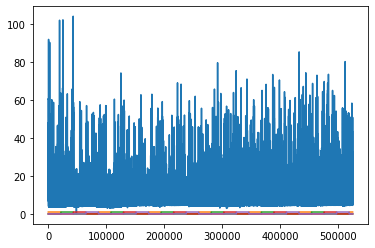

Train on 351441 samples, validate on 173099 samples
Epoch 1/10
351441/351441 [==============================] - 45s 128us/step - loss: 6.6833e-04 - val_loss: 2.4296e-04
Epoch 2/10
351441/351441 [==============================] - 43s 121us/step - loss: 4.6054e-04 - val_loss: 4.5760e-04
Epoch 3/10
351441/351441 [==============================] - 43s 122us/step - loss: 4.0541e-04 - val_loss: 3.0924e-04
Epoch 4/10
351441/351441 [==============================] - 42s 121us/step - loss: 3.4972e-04 - val_loss: 4.0995e-04
Epoch 5/10
351441/351441 [==============================] - 42s 121us/step - loss: 3.1995e-04 - val_loss: 5.6806e-04
Epoch 6/10
351441/351441 [==============================] - 42s 120us/step - loss: 3.1779e-04 - val_loss: 2.1204e-04
Epoch 7/10
351441/351441 [==============================] - 43s 122us/step - loss: 3.9484e-04 - val_loss: 5.2127e-04
Epoch 8/10
351441/351441 [==============================] - 43s 121us/step - loss: 2.7678e-04 - val_loss: 2.3244e-04
Epoch 9/10
3

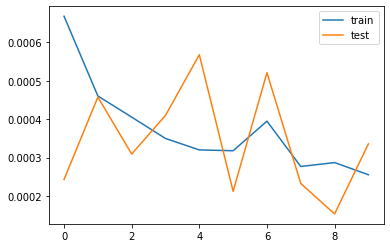

In [0]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
 


df1 = pd.read_csv("/content/gdrive/My Drive/dataset/.csv")
from sklearn.model_selection import train_test_split
import tensorflow as tf
# print(df.head())
X=df1.iloc[:524540,1:2]
for j in range(13,14):
  print("-------------------##################################-----------------------------------------"+str(j))
  y=df1.iloc[:524540,j:j+1]
  print(y)
  l=[]
  for i in range(0,524540):
    chk=i%86400
    if(chk<21600):
      l.append(0)
    elif (21600<=chk<43200):
      l.append(1)
    elif (43200<=chk<64800):
      l.append(2)
    else:
      l.append(3)
  encoded = to_categorical(l)
  dataset = pd.DataFrame({'N': encoded[:, 0], 'M': encoded[:, 1], 'A': encoded[:, 2], 'E': encoded[:, 3]})
  # print(dataset.head())

  df = pd.concat([X, dataset], axis=1)
  # print(df.head())
  import matplotlib.pyplot as plt
  plt.plot(df)
  plt.show()

  dataset = df.values
  dataset = df.astype('float32')
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)
  # print (dataset)


  # split into train and test sets
  train_size = int(len(dataset) * 0.67)
  test_size = len(dataset) - train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  # print(len(train), len(test))
  train = train.reshape((train.shape[0], 1, train.shape[1]))
  test = test.reshape((test.shape[0], 1, test.shape[1]))
  # print(train.shape)

  datay = y.values
  datay = y.astype('float32')
  scaler = MinMaxScaler(feature_range=(0, 1))
  datay = scaler.fit_transform(datay)
  # print (datay)

  trainy_size = int(len(datay) * 0.67)
  testy_size = len(datay) - trainy_size
  trainy, testy = datay[0:trainy_size,:], datay[trainy_size:len(datay),:]
  # print(len(trainy), len(testy))
  # trainy = trainy.reshape((trainy.shape[0], 1, trainy.shape[1]))
  # testy = testy.reshape((testy.shape[0], 1, testy.shape[1]))
  # print(trainy.shape)
  testy = pd.DataFrame(testy, columns=['testy'])
  
  testy.to_csv('gru-test'+str(j)+'.csv') 

  from keras.layers import GRU
  model_gru = Sequential()
  model_gru.add(GRU(75, return_sequences=True,input_shape=(train.shape[1], train.shape[2])))
  model_gru.add(GRU(units=30, return_sequences=True))
  model_gru.add(GRU(units=30))
  model_gru.add(Dense(units=1))
  model_gru.compile(loss='mae', optimizer='adam')

  history = model_gru.fit(train, trainy, epochs=10, batch_size=64, validation_data=(test, testy), shuffle=False)

  from matplotlib import pyplot
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  pyplot.show()


  from math import sqrt
  from numpy import concatenate
  # print(test.shape)
  test = test.reshape((test.shape[0], 1, test.shape[2]))
  # make a prediction
  yhat = model_gru.predict(test)
  yhat = pd.DataFrame(yhat, columns=['yhat'])
  yhat.to_csv('gru-predict'+str(j)+'.csv')
  # print(yhat)
  # test = test.reshape((test.shape[0], test.shape[2]))
  # # invert scaling for forecast
  # inv_yhat = concatenate((yhat, test[:, 1:]), axis=1)
  # inv=inv_yhat
  # inv_yhat = scaler.inverse_transform(inv_yhat)
  # inv_yhat = inv_yhat[:,0]
  # # invert scaling for actual
  # testy = testy.reshape((len(testy), 1))
  # inv_y = concatenate((testy, test[:, 1:]), axis=1)
  # rmse = sqrt(mean_squared_error(inv_y, inv))
  # print('Test RMSE: %.3f' % rmse)

  # inv_y = scaler.inverse_transform(inv_y)
  # inv_y = inv_y[:,0]
  # # calculate RMSE
  # rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
  # print('Test RMSE: %.3f' % rmse)

In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [0]:
dataset = df.values
dataset = df.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print (dataset)

[[0.58253361 1.         0.         0.         0.        ]
 [0.58253361 1.         0.         0.         0.        ]
 [0.5815739  1.         0.         0.         0.        ]
 ...
 [0.30998081 1.         0.         0.         0.        ]
 [0.31381959 1.         0.         0.         0.        ]
 [0.31285988 1.         0.         0.         0.        ]]


In [0]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
train = train.reshape((train.shape[0], 1, train.shape[1]))
test = test.reshape((test.shape[0], 1, test.shape[1]))
print(train.shape)

351441 173099
(351441, 1, 5)


In [0]:
datay = y.values
datay = y.astype('float32')

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
datay = scaler.fit_transform(datay)
print (datay)

[[0.08235294]
 [0.10588235]
 [0.10588235]
 ...
 [0.01176471]
 [0.01176471]
 [0.01176471]]


In [0]:
trainy_size = int(len(datay) * 0.67)
testy_size = len(datay) - trainy_size
trainy, testy = datay[0:trainy_size,:], datay[trainy_size:len(datay),:]
print(len(trainy), len(testy))
# trainy = trainy.reshape((trainy.shape[0], 1, trainy.shape[1]))
# testy = testy.reshape((testy.shape[0], 1, testy.shape[1]))
print(trainy.shape)

351441 173099
(351441, 1)


In [0]:
from keras.layers import GRU
model_gru = Sequential()
model_gru.add(GRU(75, return_sequences=True,input_shape=(train.shape[1], train.shape[2])))
model_gru.add(GRU(units=30, return_sequences=True))
model_gru.add(GRU(units=30))
model_gru.add(Dense(units=1))
model_gru.compile(loss='mae', optimizer='adam')


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
# fit network
history = model_gru.fit(train, trainy, epochs=10, batch_size=64, validation_data=(test, testy), shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 351441 samples, validate on 173099 samples
Epoch 1/10





351441/351441 [==============================] - 38s 108us/step - loss: 0.0131 - val_loss: 0.0208
Epoch 2/10
351441/351441 [==============================] - 37s 105us/step - loss: 0.0128 - val_loss: 0.0208
Epoch 3/10
351441/351441 [==============================] - 36s 103us/step - loss: 0.0128 - val_loss: 0.0207
Epoch 4/10
351441/351441 [==============================] - 37s 104us/step - loss: 0.0128 - val_loss: 0.0213
Epoch 5/10
351441/351441 [==============================] - 36s 104us/step - loss: 0.0128 - val_loss: 0.0209
Epoch 6/10
351441/351441 [==============================] - 36s 103us/step - loss: 0.0128 - val_loss: 0.0207
Epoch 7/10
351441/351441 [==============================] - 37s 104us/step - loss: 0.0128 - val_loss: 0.0208
Epoch 8/10
351441/351441 [==============================] - 36s 104us/step - loss: 

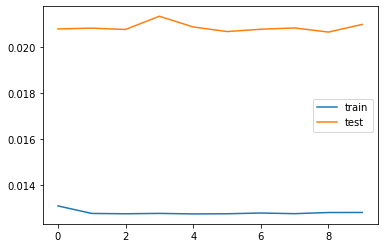

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

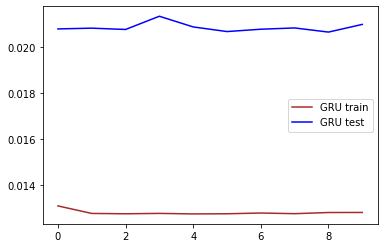

In [0]:

pyplot.plot(history.history['loss'], label='GRU train', color='brown')
pyplot.plot(history.history['val_loss'], label='GRU test', color='blue')
pyplot.legend()
pyplot.show()

In [0]:

from math import sqrt
from numpy import concatenate
print(test.shape)
test = test.reshape((test.shape[0], 1, test.shape[2]))
# make a prediction
yhat = model_gru.predict(test)
print(yhat)
test = test.reshape((test.shape[0], test.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test[:, 1:]), axis=1)
inv=inv_yhat
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
testy = testy.reshape((len(testy), 1))
inv_y = concatenate((testy, test[:, 1:]), axis=1)
rmse = sqrt(mean_squared_error(inv_y, inv))
print('Test RMSE: %.3f' % rmse)

inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(173099, 1, 5)
[[0.01260502]
 [0.01260501]
 [0.01260501]
 ...
 [0.01260674]
 [0.01260676]
 [0.01260675]]
Test RMSE: 0.018
Test RMSE: 0.350


In [0]:
print(invy.shape)

NameError: ignored

In [0]:
pyplot.plot(testy.shape[0], label='actual')
pyplot.plot(invy, label='predicted')
pyplot.legend()
pyplot.show()

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)
print(trainY)

[[[0.58253361 1.         0.         0.         0.        ]]

 [[0.58253361 1.         0.         0.         0.        ]]

 [[0.5815739  1.         0.         0.         0.        ]]

 ...

 [[0.05662188 1.         0.         0.         0.        ]]

 [[0.05470249 1.         0.         0.         0.        ]]

 [[0.05470249 1.         0.         0.         0.        ]]]
[0.58253361 0.5815739  0.42898275 ... 0.05470249 0.05470249 0.05470249]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1,activation='relu',input_shape=(1,52454)))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=1000, verbose=0)

yhat = model.predict(X_test, verbose=0)
print(yhat)

ValueError: ignored